# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [4]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
#from keras.utils import np_utils
from sklearn import metrics as me

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [5]:
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


Create the MLP

In [6]:
model = Sequential()
model.add(Dense(255, input_shape=(784,), activation='relu'))
#model.add(Dense(255, input_shape=(784,), activation='tanh'))

model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

C:\Users\Julien\miniconda3\envs\ARN\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 255)                 │         200,175 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 255)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,560 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 202,735 (791.93 KB)

 Trainable params: 202,735 (791.93 KB)

 Non-trainable params: 0 (0.00 B)

Define some constants and train the MLP

In [7]:
batch_size = 128
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8113 - loss: 0.6400 - val_accuracy: 0.9587 - val_loss: 0.1536
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9335 - loss: 0.2239 - val_accuracy: 0.9688 - val_loss: 0.1115
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9490 - loss: 0.1715 - val_accuracy: 0.9713 - val_loss: 0.0956
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9563 - loss: 0.1442 - val_accuracy: 0.9762 - val_loss: 0.0847
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9642 - loss: 0.1220 - val_accuracy: 0.9780 - val_loss: 0.0767
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9671 - loss: 0.1087 - val_accuracy: 0.9795 - val_loss: 0.0745
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9687 - loss: 0.1011 - val_accuracy: 0.9785 - val_loss: 0.0711
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9714 - loss: 0.0966 - val_accuracy: 0.

Show the performance of the model

Test score: 0.0734509751200676
Test accuracy: 0.9793000221252441


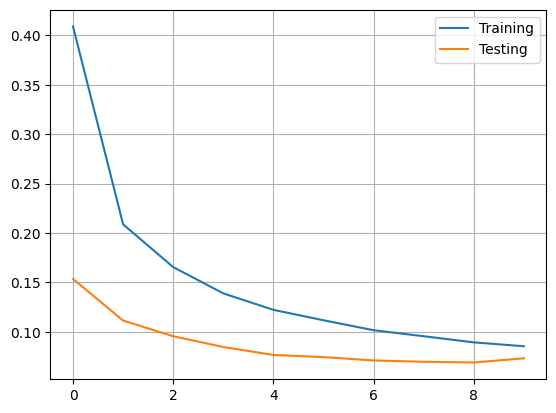

In [8]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Confusion matrix

In [10]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)
confusion_matrix(y_test, pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ 972,    0,    1,    2,    1,    0,    1,    1,    1,    1],
       [   0, 1120,    3,    1,    0,    1,    2,    0,    8,    0],
       [   4,    1, 1014,    2,    2,    0,    1,    5,    3,    0],
       [   1,    0,    2,  994,    0,    7,    0,    3,    3,    0],
       [   1,    0,    3,    0,  961,    0,    7,    0,    2,    8],
       [   2,    0,    0,    7,    0,  870,    9,    1,    2,    1],
       [   6,    2,    0,    1,    1,    3,  944,    0,    1,    0],
       [   1,    3,   11,    5,    1,    0,    0,  999,    1,    7],
       [   3,    0,    5,    5,    4,    4,    6,    5,  939,    3],
       [   3,    4,    0,    5,    7,    2,    1,    5,    2,  980]],
      dtype=int64)